In [35]:
import os
import re
import pandas as pd
import numpy as np
import sys
import glob
import traceback

sys.path.append('/lib')
import lib.helper as helper

%matplotlib inline

In [36]:
# Absolute or relative path to workshop data extracted from AMY
workshops_file = "data/raw/carpentry-workshops_GB_2018-11-08.csv"

In [37]:
workshops_df = pd.read_csv(workshops_file, encoding = "utf-8")

      number_of_workshops
year                     
2012                    7
2013                   14
2014                   21
2015                   30
2016                   40
2017                   47
2018                   45
2019                    1


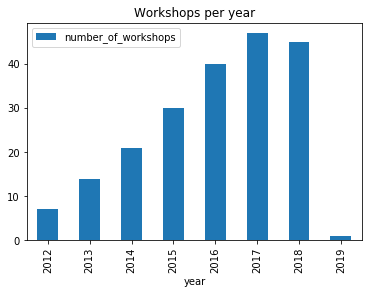

In [38]:
# How many workshops are there for each year?
workshops_per_year = workshops_df['year'].value_counts()
workshops_per_year.sort_index(ascending = True, inplace=True)
workshops_per_year.index.name = 'year'
workshops_per_year = workshops_per_year.to_frame('number_of_workshops')
print(workshops_per_year)
workshops_per_year.plot(kind='bar', legend=True, title ="Workshops per year")

               number_of_workshops
workshop_type                     
SWC                            162
DC                              29
TTT                             12
LC                               2


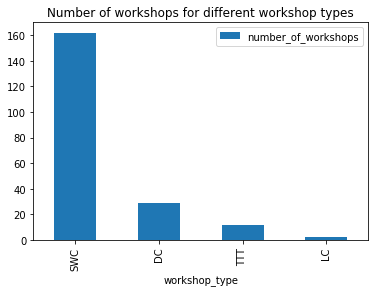

In [39]:
# How many SWC, DC, LC, TTT workshops were held so far?
workshops_per_type = workshops_df['workshop_type'].value_counts()
workshops_per_type.index.name = 'workshop_type'
workshops_per_type = workshops_per_type.to_frame('number_of_workshops')
print(workshops_per_type)
workshops_per_type.plot(kind='bar', legend=True, title ="Number of workshops for different workshop types")

workshop_type  DC  LC  SWC  TTT
year                           
2012            0   0    7    0
2013            0   0   14    0
2014            0   0   21    0
2015            2   0   25    3
2016            7   0   30    3
2017           12   1   30    4
2018            8   1   34    2
2019            0   0    1    0


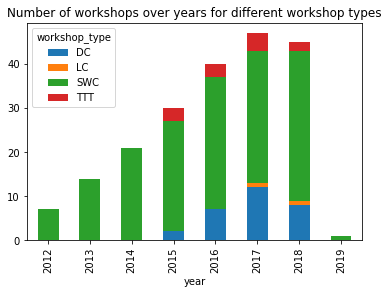

In [40]:
# How are numbers of different workshops (SWC, DC, LC, TTT) changing over years?
workshops_per_type_per_year = workshops_df.groupby(['workshop_type', 'year'])['workshop_type'].count().unstack('workshop_type').fillna(0).astype(dtype='int')
workshops_per_type_per_year.plot(kind='bar', stacked=True, title="Number of workshops over years for different workshop types")
print(workshops_per_type_per_year)

In [41]:
print(workshops_per_type_per_year.columns)

Index(['DC', 'LC', 'SWC', 'TTT'], dtype='object', name='workshop_type')


ucl.ac.uk                          26
imperial.ac.uk                     17
leeds.ac.uk                        15
manchester.ac.uk                   15
ed.ac.uk                           14
ox.ac.uk                           11
southampton.ac.uk                  10
cam.ac.uk                           8
software-carpentry.org              6
st-andrews.ac.uk                    6
earlham.ac.uk                       5
bristol.ac.uk                       4
anthro.ox.ac.uk                     4
regenmedcdt.manchester.ac.uk        3
tgac.ac.uk                          3
epcc.ed.ac.uk                       3
kcl.ac.uk                           3
shef.ac.uk                          3
aber.ac.uk                          3
dundee.ac.uk                        3
nhm.ac.uk                           2
qub.ac.uk                           2
bham.ac.uk                          2
nottingham.ac.uk                    2
software.ac.uk                      2
qmul.ac.uk                          2
gla.ac.uk   

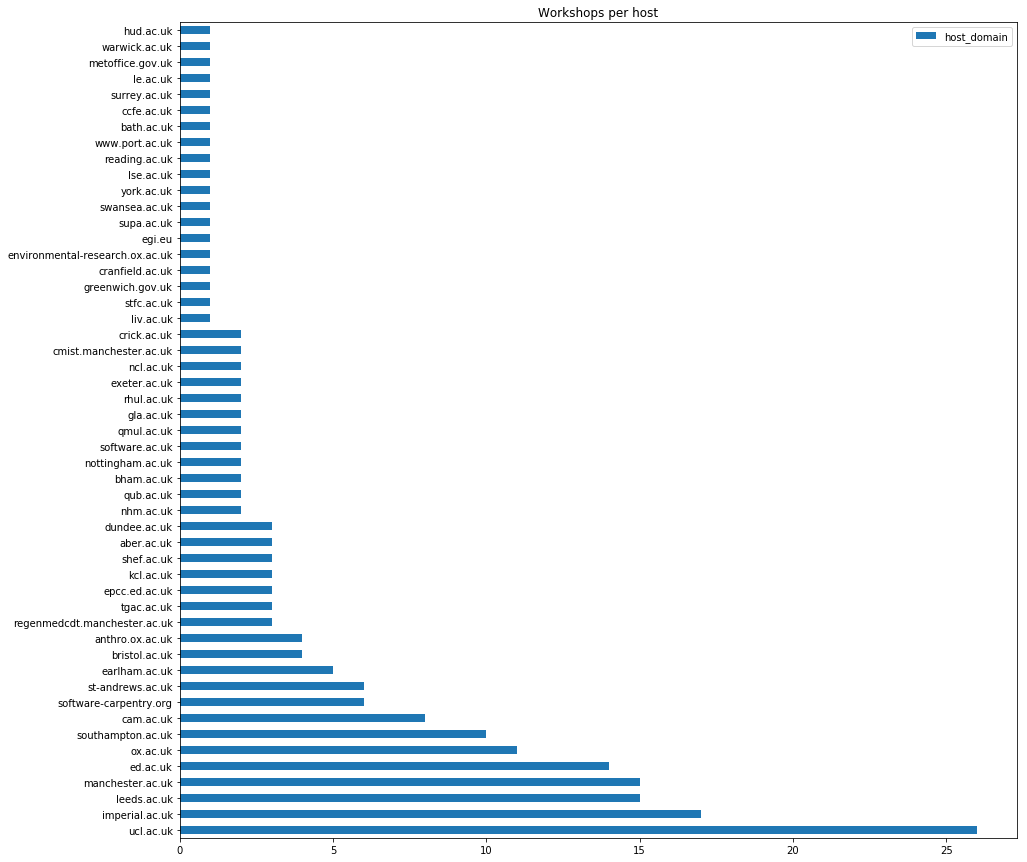

In [42]:
# How many workshops were held at each host institution?
workshops_per_host = workshops_df['host_domain'].value_counts()
print(workshops_per_host)
workshops_per_host.plot(kind='barh', legend=True, title ="Workshops per host", figsize = (15,15))

year
2012     228
2013     439
2014     509
2015     821
2016     846
2017    1044
2018     409
2019       0
Name: attendance, dtype: int64


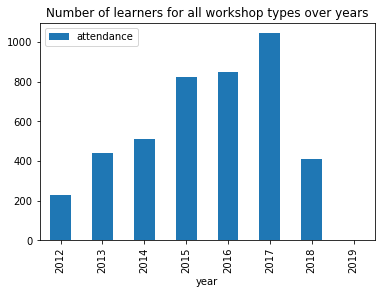

In [43]:
# How many learners attended workshops over years?
attendance_per_year = workshops_df.groupby(['year'])["attendance"].sum().fillna(0).astype("int")
print(attendance_per_year)
attendance_per_year.plot(kind='bar', legend=True, title ="Number of learners for all workshop types over years")

Average workshop attendance: 24

year
2012     228
2013     439
2014     533
2015     821
2016     846
2017    1044
2018     961
2019      24
Name: attendance, dtype: int64


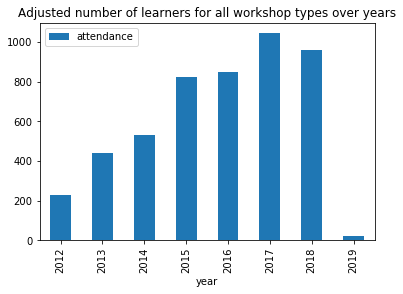

In [44]:
# How many learners attended workshops over years (with adjustments for missing attendance data with average attendance)?

# Disregard TTT workshops as they have attendance capped at 20 most of the times
average_attendance = round(workshops_df[workshops_df["workshop_type"] != "TTT"]["attendance"].mean())
print("Average workshop attendance: " + str(average_attendance) + "\n")
# Adjusted attendance over year data and graph
workshops_df["attendance"].fillna(average_attendance, inplace=True)
attendance_per_year = workshops_df.groupby(['year'])["attendance"].sum().astype("int")
print(attendance_per_year)
attendance_per_year.plot(kind='bar', legend=True, title ="Adjusted number of learners for all workshop types over years")

workshop_type
DC      675
LC       76
SWC    3914
TTT     231
Name: attendance, dtype: int64


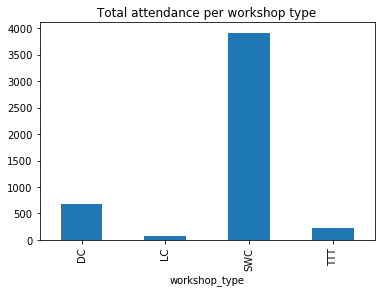

In [45]:
# Total attendance for different workshop types (with missing data adjusted with average attendance)
attendance_per_type = workshops_df.groupby(['workshop_type'])['attendance'].sum().astype("int")
print(attendance_per_type)
attendance_per_type.plot(kind="bar", title="Total attendance per workshop type")

workshop_type   DC  LC  SWC  TTT
year                            
2012             0   0  228    0
2013             0   0  439    0
2014             0   0  533    0
2015            78   0  686   57
2016           144   0  642   60
2017           284  51  624   85
2018           169  25  738   29
2019             0   0   24    0


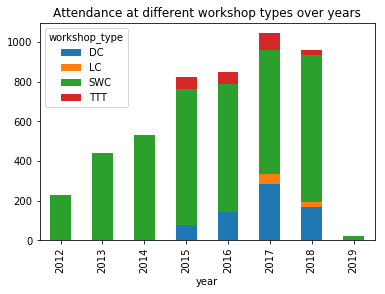

In [46]:
# How many learners attended each of (SWC, DC, LC, TTT) workshops over years (missing data adjusted by average attendance)?
attendance_per_type_per_year = workshops_df.groupby(['workshop_type', 'year'])['attendance'].sum().unstack("workshop_type").fillna(0).astype("int")
print(attendance_per_type_per_year)
attendance_per_type_per_year.plot(kind='bar', stacked=True, title="Attendance at different workshop types over years")


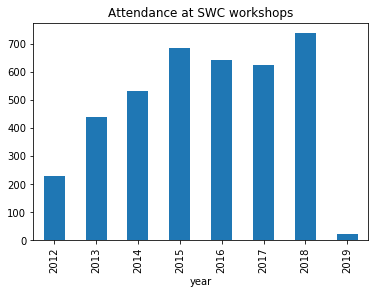

In [47]:
# Attendance just for SWC workshops over years
# Can be done similarly for DC, LC, TTT workshops, this is just an example
attendance_per_type_per_year["SWC"].plot(kind='bar', title="Attendance at SWC workshops")

In [48]:
# How are workshops spread over UK regions?
workshops_df['region'] = workshops_df.apply(lambda x: helper.get_uk_region(airport_code=np.nan, latitude=x['latitude'],
                                    longitude=x['longitude']), axis=1)
print("This took a while but it finished now")

Looking up region for geocoordinates: (52.621741, 1.218987)
Looking up region for geocoordinates: (56.339324, -2.7939830000000003)
Looking up region for geocoordinates: (51.523999999999994, -0.13512000000000002)
Looking up region for geocoordinates: (51.52538039, -0.132326449)
Looking up region for geocoordinates: (51.4988, -0.174877)
Looking up region for geocoordinates: (51.493632, -0.07396699999999999)
Looking up region for geocoordinates: (51.760053000000006, -1.258617)
Looking up region for geocoordinates: (-48.876667, -123.39333300000001)
Looking up region for geocoordinates: (51.52528389, 0.133528483)
Looking up region for geocoordinates: (52.450237, -1.934362)
Looking up region for geocoordinates: (51.4988, -0.174877)
Looking up region for geocoordinates: (55.94424, -3.19018)
Looking up region for geocoordinates: (50.89267, -1.39459)
Looking up region for geocoordinates: (55.921711, -3.173591)
Looking up region for geocoordinates: (51.760206, -1.2665389999999999)
Looking up reg

                           number_of_workshops
region                                        
London                                      55
South East                                  35
Scotland                                    30
North West                                  23
Yorkshire and The Humber                    21
Eastern                                     16
South West                                   8
East Midlands                                5
Wales                                        4
West Midlands                                3
Northern Ireland                             2
North East                                   2
Not in a UK region/online                    1


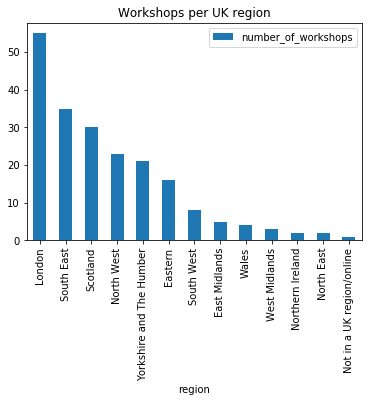

In [52]:
# Plot workshops over UK regions
workshops_per_UK_region = workshops_df['region'].value_counts()
workshops_per_UK_region.index.name = 'region'
workshops_per_UK_region = workshops_per_UK_region.to_frame('number_of_workshops')
print(workshops_per_UK_region)
workshops_per_UK_region.plot(kind='bar', legend=True, title ="Workshops per UK region")

In [49]:
# Save all analyses into an Excel spreadsheet
ANALYSES_DIR = "data/analyses/"
if not os.path.exists(ANALYSES_DIR):
    os.makedirs(ANALYSES_DIR)

workshops_file_name = os.path.basename(workshops_file)
workshops_file_name_without_extension = re.sub('\.csv$', '', workshops_file_name.strip())
workshop_analyses_excel_file = ANALYSES_DIR + "analysed_" + workshops_file_name_without_extension + '_from_ipynb.xlsx'

excel_writer = pd.ExcelWriter(workshop_analyses_excel_file, engine='xlsxwriter')

workshops_df.to_excel(excel_writer, sheet_name="carpentry_workshops", index=False)

# Workshops per year
workshops_per_year.to_excel(excel_writer, sheet_name='workshops_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_year', 1, 0, len(workshops_per_year.index), 0],
        'values': ['workshops_per_year', 1, 1, len(workshops_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per year'})
worksheet.insert_chart('I2', chart)

# Workshops per type   
workshops_per_type.to_excel(excel_writer, sheet_name='workshops_per_type', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_type']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_type', 1, 0, len(workshops_per_type.index), 0],
        'values': ['workshops_per_type', 1, 1, len(workshops_per_type.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Workshop type'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops of different types'})
worksheet.insert_chart('I2', chart)
    
# Workshops per type per year
workshops_per_type_per_year.to_excel(excel_writer, sheet_name='workshops_per_type_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_type_per_year']
chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
for i in range(1, len(workshops_per_type_per_year.columns) + 1):
    chart.add_series({
            'name': ['workshops_per_type_per_year', 0, i],
            'categories': ['workshops_per_type_per_year', i, 0, len(workshops_per_type_per_year.index), 0],
            'values': ['workshops_per_type_per_year', 1, i, len(workshops_per_type_per_year.index), i],
            'gap': 2,
        })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops of different types over years'})
worksheet.insert_chart('B20', chart)

# Workshops per host
workshops_per_host.to_excel(excel_writer, sheet_name='workshops_per_host', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_host']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_host', 1, 0, len(workshops_per_host.index), 0],
        'values': ['workshops_per_host', 1, 1, len(workshops_per_host.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per host'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per year
attendance_per_year.to_excel(excel_writer, sheet_name='attendance_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['attendance_per_year', 1, 0, len(attendance_per_year.index), 0],
        'values': ['attendance_per_year', 1, 1, len(attendance_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of attendees', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of attendees per year (with estimates for missing data)'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per workshop type
attendance_per_type.to_excel(excel_writer, sheet_name='attendance_per_type', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_type']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['attendance_per_type', 1, 0, len(attendance_per_type.index), 0],
        'values': ['attendance_per_type', 1, 1, len(attendance_per_type.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Workshop type'})
chart.set_y_axis({'name': 'Number of attendees', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of attendees per workshop type (with estimates for missing data)'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per workshop type per year
attendance_per_type_per_year.to_excel(excel_writer, sheet_name='attendance_per_type_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_type_per_year']
chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
for i in range(1, len(attendance_per_type_per_year.columns) + 1):
    chart.add_series({
            'name': ['attendance_per_type_per_year', 0, i],
            'categories': ['attendance_per_type_per_year', i, 0, len(attendance_per_type_per_year.index), 0],
            'values': ['attendance_per_type_per_year', 1, i, len(attendance_per_type_per_year.index), i],
            'gap': 2,
        })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Attendance', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Attendance at workshops of different types over years (with estimates for missing data)'})
worksheet.insert_chart('B20', chart)

excel_writer.save()
print("Saved workshop analyses in " + workshop_analyses_excel_file)

Saved workshop analyses in data/analyses/analysed_carpentry-workshops_GB_2018-11-08_from_ipynb.xlsx
